# **Used Car Price Recommendation**

By: Bernando Virto Gunawan

## Business Understanding

### Context

Car-Connect is a platform that connects car sellers and buyers across Saudi Arabia, aiming to simplify and accelerate the used car trading process. Operating in a market with rising demand for pre-owned vehicles, Car Connect provides a centralized marketplace where individual sellers and dealers can list their cars and reach a wide audience. Car-Connect generates revenue through transaction fees, paid listings, and promotional services. To remain competitive and add value to its users, Car Connect seeks to introduce intelligent tools that improve user experience and trust.

### Problem Statement

In the growing used car market, determining a fair and competitive price remains a significant challenge for both sellers and buyers. Sellers may struggle to set the right price, risking either undervaluation or overpricing, which can lead to slow sales or missed opportunities. Buyers, on the other hand, face uncertainty when evaluating whether a car is reasonably priced. This lack of transparency can reduce trust in the platform and delay transactions. Therefore, there is a clear need for a reliable pricing recommendation system that supports informed decision-making and builds market confidence.

### Goal

The goal of this project is to develop a data-driven car price recommendation system that provides accurate price suggestions based on vehicle attributes. This system will help sellers list their cars at competitive market rates, assist buyers in identifying fair deals, and ultimately contribute to faster transactions and higher user satisfaction. By enhancing transparency and pricing efficiency, the system is expected to boost customer trust, increase platform usage, and drive revenue growth through higher transaction volumes and potential upsells in advertisement services.

### Metric Evaluation

To evaluate the performance of our regression model, we use the following metrics:

- Mean Absolute Error (MAE):

    Measures the average absolute difference between the predicted and actual car prices. It provides a straightforward interpretation of the typical error in Saudi Riyals (SAR).

- Mean Absolute Percentage Error (MAPE):

    Expresses the average error as a percentage of the actual car price. This helps understand the relative accuracy of the predictions, especially across different price ranges.

- Root Mean Squared Error (RMSE):

    Measures the square root of the average squared differences between predicted and actual values. This metric penalizes larger errors more than MAE, making it useful for detecting outliers or high-variance predictions.

To ensure our model delivers highly accurate predictions, we will place greater emphasis on minimizing the Root Mean Squared Error (RMSE).

### Success Criteria

Defining success for our pricing model requires business context and possibly external data. Since those aren't fully available, we'll proceed with the following assumptions:

**Assumption:**
- Car-Connect charges a flat fee of 500 SAR for every car sold through the platform.
- The platform facilitates the sale of approximately 1,000 cars per month.
- On average, it takes approximately 9 days to sell a car listed online.

- Car-Connect also employs experts to inspect car conditions, each inspection is priced at 85 SAR and an expert can inspect up to 6 cars per day.
- The monthly salary for each expert is 9,000 SAR, based on a work schedule of 22 days per month.

- Buyers or sellers typically incur a loss of around 5,000 SAR per car if they do not utilize reliable pricing tools.


Based on these assumptions, we will calculate the cost and revenue.

**Before Using the Model:**

Let’s assume that every buyer utilizes our expert pricing model.

- Monthly revenue:
    - Car Sale: 500 SAR * 1,000 = 500,000 SAR
    - Experts : 85 SAR * 1,000 = 85,000 SAR

    total revenue : 585,000 SAR

- Monthly cost:

   Since an average of 1,000 cars are sold using expert evaluations, Car-Connect will need to employ 8 experts to handle this volume.

    - 9,000 SAR * 8 = 72,000 SAR

profit = 585,000 SAR - 72,000 SAR = 513,000 SAR

**After Using the Model:**

To calculate the benefits of implementing the machine learning model, we assume:

- A 10% increase in sales volume, driven by faster car sales resulting from improved price accuracy.

- A 20% reduction in demand for expert inspections, as customers can more accurately price their cars independently, reducing the need for expert evaluations.

Cost calculation :
- Monthly revenue:
    - Car Sale: 500 SAR * (110% * 1,000) = 550,000 SAR
    - Experts : 85 SAR * (80% * 1000) = 68,000 SAR
- Monthly cost:

    With the demand for expert evaluations decreasing to 800 cars per month, we can reduce the workforce by one expert.

    - 9,000 SAR * 7 = 63,000 SAR 

total revenue : 618,000 SAR - 63,000 SAR = 555,000 SAR

Based on the assumptions above, implementing the machine learning model would enable Car-Connect to gain approximately 42,000 SAR. However, this estimate does not account for the costs of training and maintaining the model.

Additionally, by providing accurate price predictions, Car-Connect would build greater trust with users, which could help attract new customers and expand its market presence.

<br>
The profit estimated above depends on having a model that predicts used-car prices accurately.

The key question is: 

`how accurate must the model be?` 

Let’s calculate that.

**Target Error Threshold**

Based on the data, the average used car price is approximately 77,975 SAR. Given that poor pricing can lead to an average loss of 5,000 SAR per vehicle, our model should aim to reduce this loss significantly.

To consider the model effective, we set the following performance targets:

- MAE (Mean Absolute Error): < 5,000 SAR

- MAPE (Mean Absolute Percentage Error): < 6.5%

- RMSE (Root Mean Squared Error): < 7,000 SAR

Meeting these thresholds would indicate that the model is successfully minimizing pricing errors, leading to fairer outcomes for both buyers and sellers.

## Dataset

- Datasets contains 5624 records of used cars collected from syarah.com
- Each row represents used car listing in the website

the features are:

| **Attribute** | **Description** | **Data Type** |
| --- | --- | --- |
| Type | Type of used car. | Object |
| Region | The region in which the used car was offered for sale. | Object |
| Make | The company name. | Object |
| Gear_Type | Gear type size of used car. (automatic, manual) | Object |
| Origin | Origin of used car. | Object |
| Options | Options of used car. (full, semi-full, standard) | Object |
| Year | Manufacturing year. | Number |
| Engine_Size | The engine size of used car. (liters) | Number |
| Mileage | Mileage of used car. (KM) | Number |
| Negotiable | True if the price is 0, that means it is negotiable. | Boolean |
| Price | Used car price. (SAR) | Number |

<br>

### Analytic Approach

Since our goal is to predict used car prices, we will approach this as a regression problem and develop a suitable regression model.

**The process for this experiment will be as follows:**

- Perform general preprocessing on the dataset.
- Train and evaluate the following baseline models:
    - Linear Regression
    - K-Nearest Neighbors Regressor
    - Decision Tree Regressor
    - Random Forest Regressor
    - Support Vector Regressor
    - Adaboost
    - XGBoost

- Identify the best-performing model based on evaluation metrics.
- Fine-tune the hyperparameters of the selected model.
- Compare the optimized model against its baseline model.
- Select the final model based on overall performance and generalization ability.

## Import Dependancies

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from category_encoders import BinaryEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from feature_engine.outliers import ArbitraryOutlierCapper
from sklearn.feature_selection import SelectKBest
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

# Evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Model Interpretation
import shap

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [2]:
df = pd.read_csv("Saudi Arabia Used Cars/data_saudi_used_cars.csv")

## Basic Data Cleaning

Before we begin analyzing the data, we will perform basic data cleaning to ensure quality and consistency. The key steps include:

- Removing duplicate entries
- Handling missing values
- Resolving inconsistent or invalid data entries
- Identifying and addressing outliers

### Handling Duplicates

In [3]:
# Duplicates
df[df.duplicated(keep=False)]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
236,Sonata,Jeddah,Hyundai,Automatic,Saudi,Standard,2020,2.4,100,False,72910
540,Rio,Riyadh,Kia,Automatic,Saudi,Standard,2016,1.4,270000,False,25000
953,Rio,Riyadh,Kia,Automatic,Saudi,Standard,2016,1.4,270000,False,25000
2012,Tucson,Dammam,Hyundai,Automatic,Saudi,Standard,2016,2.0,155000,False,45000
3631,Camry,Riyadh,Toyota,Automatic,Saudi,Full,2013,2.5,185000,True,0
4646,Sonata,Jeddah,Hyundai,Automatic,Saudi,Standard,2020,2.4,100,False,72910
4933,Tucson,Dammam,Hyundai,Automatic,Saudi,Standard,2016,2.0,155000,False,45000
5267,Camry,Riyadh,Toyota,Automatic,Saudi,Full,2013,2.5,185000,True,0


We identified four duplicated entries in the dataset. Given that it is highly unlikely for two used cars to share identical features—especially mileage—these duplicates are most likely due to input errors or relistings by the seller (e.g., reposting the same car to increase visibility due to slow sales). Based on this reasoning, we decided to remove the duplicate entries, retaining only one instance of each.

In [4]:
df = df.drop_duplicates()

### Handling Missing Values

In [5]:
df.isna().sum()

Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64

The data doesn't contain any missing value

### Handling Inconsistency

In [6]:
df.select_dtypes("O").head()

,Type,Region,Make,Gear_Type,Origin,Options
0,Corolla,Abha,Toyota,Manual,Saudi,Standard
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full


We will check each of these categorical column for inconsistent value

#### `Type` Column

In [7]:
df["Type"].unique()

array(['Corolla', 'Yukon', 'Range Rover', 'Optima', 'FJ', 'CX3',
       'Cayenne S', 'Sonata', 'Avalon', 'LS', 'C300', 'Land Cruiser',
       'Hilux', 'Tucson', 'Caprice', 'Sunny', 'Pajero', 'Azera', 'Focus',
       '5', 'Spark', 'Camry', 'Pathfinder', 'Accent', 'ML', 'Tahoe',
       'Yaris', 'Suburban', 'A', 'Altima', 'Traverse', 'Expedition',
       'Senta fe', 'Liberty', '3', 'X', 'Elantra', 'Land Cruiser Pickup',
       'VTC', 'Malibu', 'The 5', 'A8', 'Patrol', 'Grand Cherokee', 'SL',
       'Previa', 'SEL', 'Aveo', 'MKZ', 'Victoria', 'Datsun', 'Flex',
       'GLC', 'ES', 'Edge', '6', 'Escalade', 'Innova', 'Navara', 'H1',
       'G80', 'Carnival', 'Symbol', 'Camaro', 'Accord', 'Avanza',
       'Land Cruiser 70', 'Taurus', 'C5700', 'Impala', 'Optra', 'S',
       'Other', 'Cerato', 'Furniture', 'Murano', 'Explorer', 'LX',
       'Pick up', 'Charger', 'H6', 'BT-50', 'Hiace', 'Ranger', 'Fusion',
       'Rav4', 'Ciocca', 'CX9', 'Kona', 'Sentra', 'Sierra', 'Durango',
       'CT-S', 'Sylv

A more thorough understanding of valid car models would be necessary to fully verify the authenticity of this column. However, based on an initial inspection, the entries appear to be reasonably clean and consistent. Therefore, we will proceed without making modifications at this stage.

#### `Region` column

In [8]:
df["Region"].unique()

array(['Abha', 'Riyadh', 'Hafar Al-Batin', 'Aseer', 'Makkah', 'Dammam',
       'Yanbu', 'Al-Baha', 'Jeddah', 'Hail', 'Khobar', 'Al-Ahsa', 'Jazan',
       'Al-Medina', 'Al-Namas', 'Tabouk', 'Taef', 'Qassim', 'Arar',
       'Jubail', 'Sabya', 'Al-Jouf', 'Najran', 'Wadi Dawasir', 'Qurayyat',
       'Sakaka', 'Besha'], dtype=object)

There is no inconsistent value in `Region` column

#### `Make` Column

In [9]:
df["Make"].unique()

array(['Toyota', 'GMC', 'Land Rover', 'Kia', 'Mazda', 'Porsche',
       'Hyundai', 'Lexus', 'Chrysler', 'Chevrolet', 'Nissan',
       'Mitsubishi', 'Ford', 'MG', 'Mercedes', 'Jeep', 'BMW', 'Audi',
       'Lincoln', 'Cadillac', 'Genesis', 'Renault', 'Honda', 'Suzuki',
       'Zhengzhou', 'Dodge', 'HAVAL', 'INFINITI', 'Isuzu', 'Changan',
       'Aston Martin', 'Mercury', 'Great Wall', 'Other', 'Rolls-Royce',
       'MINI', 'Volkswagen', 'BYD', 'Geely', 'Victory Auto', 'Classic',
       'Jaguar', 'Daihatsu', 'Maserati', 'Hummer', 'GAC', 'Lifan',
       'Bentley', 'Chery', 'Peugeot', 'Foton', 'Škoda', 'Fiat', 'Iveco',
       'SsangYong', 'FAW', 'Tata', 'Ferrari'], dtype=object)

There is no inconsisten value in `Make` column

#### `Gear_Type` column

In [10]:
df["Gear_Type"].unique()

array(['Manual', 'Automatic'], dtype=object)

There is no inconsistent value in `Gear_Type` column

#### `Origin` column

In [11]:
df["Origin"].unique()

array(['Saudi', 'Gulf Arabic', 'Other', 'Unknown'], dtype=object)

In [12]:
df["Origin"].value_counts()

Origin
Saudi          4184
Gulf Arabic     697
Other           678
Unknown          61
Name: count, dtype: int64

There is no inconsistent value in `Origin` column

#### `Options` column

In [13]:
df["Options"].unique()

array(['Standard', 'Full', 'Semi Full'], dtype=object)

There is no inconsistent value in `Options` column

### Handling Outliers

We will remove records with extreme outliers in any feature. Outliers are values that fall far outside the typical range of the data and may negatively affect the model's performance.

Text(0.5, 0.98, 'Distribution Accross Numerical Columns')

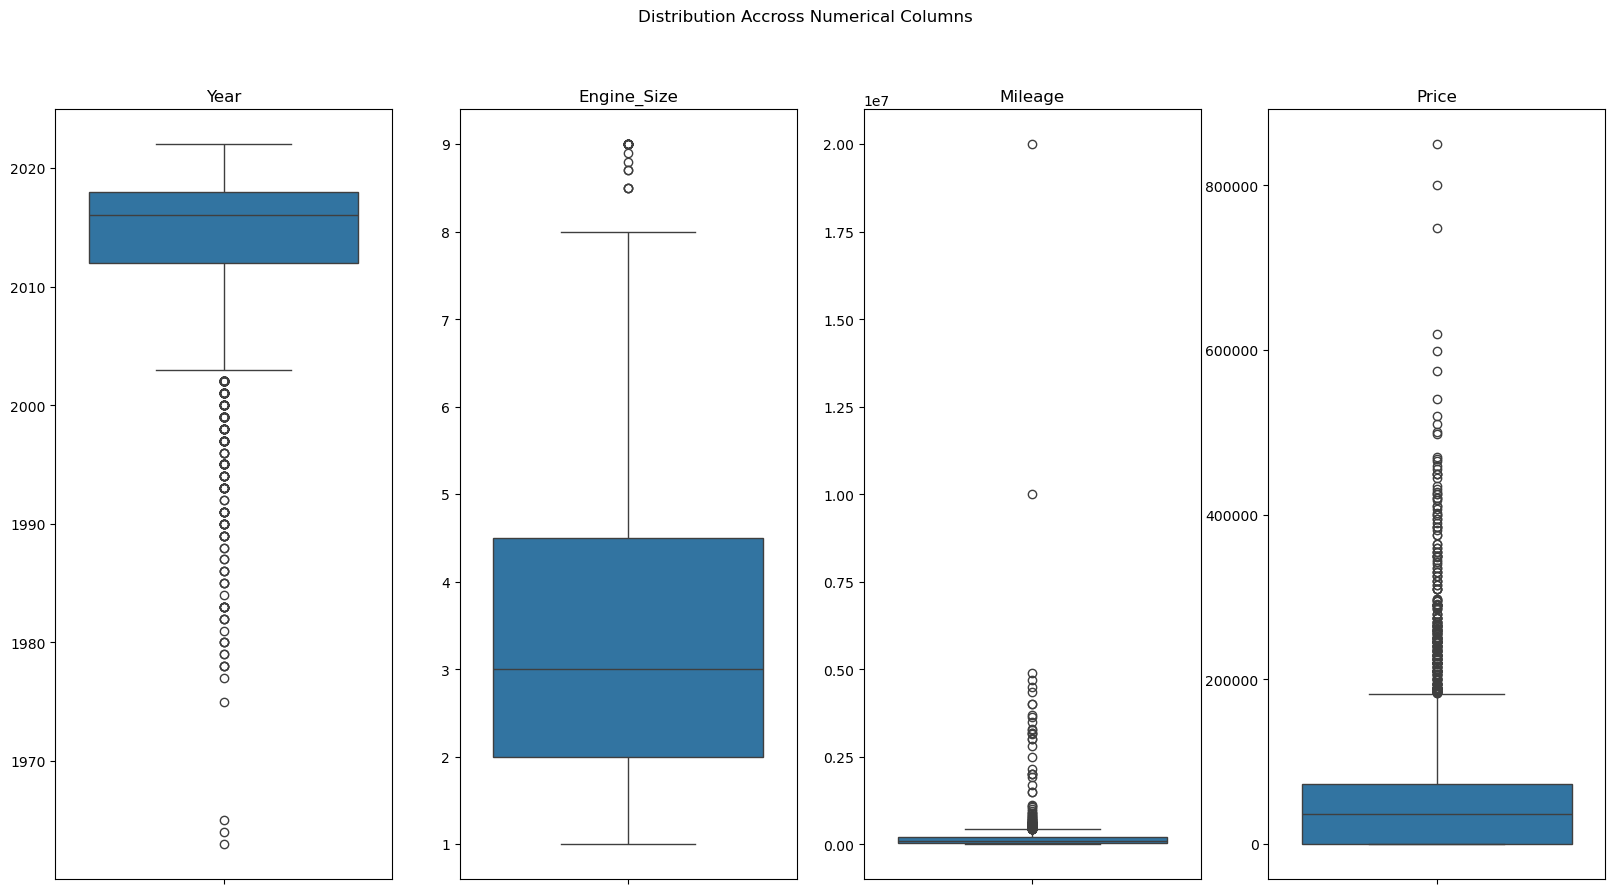

In [14]:
numerical_column = list(df.select_dtypes("number").columns)
fig, axes = plt.subplots(ncols=4,nrows=1,figsize=(20,10))

for num in range(len(numerical_column)):
    sns.boxplot(df,
                y = numerical_column[num],
                ax=axes[num])
    axes[num].set_title(f"{numerical_column[num]}")
    axes[num].set_ylabel("")

fig.suptitle("Distribution Accross Numerical Columns")

From the boxplots above, we can observe that all of the columns contain outliers. While outliers can represent valid data points, some of them are significantly distant from the rest of the distribution. Due to the lack of similar data points, these extreme outliers can disproportionately influence the model and potentially degrade its performance. Therefore, we have decided to remove these extreme outliers to ensure better model stability and generalization.

To detect these, we use the Interquartile Range (IQR) method. IQR is the range between the 25th percentile (Q1) and the 75th percentile (Q3) of the data, representing the middle 50% of values. Extreme outliers are those that fall significantly beyond the typical range — specifically, more than three times the IQR below the 25th percentile or above the 75th percentile.

In [15]:
numerical_column = list(df.select_dtypes("number").columns)

extreme_outlier = []
for column in numerical_column:
    q3 = df[column].quantile(0.75)
    q1 = df[column].quantile(0.25)
    iqr = q3 - q1
    upper_bound = q3 + (3 * iqr)
    lower_bound = q1 - (3 * iqr)

    extreme_outlier.append((column,lower_bound,upper_bound))

In [16]:
# Check the boundaries of the extreme outliers
extreme_outlier = pd.DataFrame(extreme_outlier,columns=["column","lower_bound","upper_bound"])
extreme_outlier

,column,lower_bound,upper_bound
0,Year,1994.0,2036.0
1,Engine_Size,-5.5,12.0
2,Mileage,-436000.0,670000.0
3,Price,-219000.0,292000.0


In [17]:
# Removing the extreme outliers
df_analysis = df[df["Year"]>= 1994]
df_analysis = df_analysis[df_analysis["Engine_Size"]<= 12]
df_analysis = df_analysis[df_analysis["Mileage"]<= 670000]
df_analysis = df_analysis[df_analysis["Price"]<= 292000]

In [18]:
df_analysis.describe()

,Year,Engine_Size,Mileage,Price
count,5427.000000,5427.000000,5427.000000,5427.000000
mean,2014.450157,3.272360,130822.845218,48635.469504
std,4.758434,1.500778,116449.086255,55145.638098
min,1994.000000,1.000000,100.000000,0.000000
25%,2013.000000,2.000000,40000.000000,0.000000
50%,2016.000000,3.000000,104000.000000,36500.000000
75%,2018.000000,4.000000,194000.000000,71000.000000
max,2022.000000,9.000000,650000.000000,291500.000000


Additionaly, we found that Price column contains values that do not make sense. This issue appears to stem from the "Negotiable" column, where listings marked as negotiable always have a recorded price of 0. Further research indicates that the minimum realistic price for a used car in Saudi Arabia is approximately 1,500 SAR. Therefore, for the purpose of initial data analysis, we will temporarily remove all entries with a price below 1,500 SAR.

In [19]:
# removing cars with price less than 1500
df_analysis = df_analysis[df_analysis["Price"]> 1500]
df_analysis.shape

(3657, 11)

In [20]:
len(df_analysis)/len(df)

0.650711743772242

We retained approximately 65 % of the original dataset for analysis.

## Exploratory Data Analysis (EDA)

In [21]:
df_analysis.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False,85000


In [22]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3657 entries, 1 to 5622
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         3657 non-null   object 
 1   Region       3657 non-null   object 
 2   Make         3657 non-null   object 
 3   Gear_Type    3657 non-null   object 
 4   Origin       3657 non-null   object 
 5   Options      3657 non-null   object 
 6   Year         3657 non-null   int64  
 7   Engine_Size  3657 non-null   float64
 8   Mileage      3657 non-null   int64  
 9   Negotiable   3657 non-null   bool   
 10  Price        3657 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 317.8+ KB


### Categorical Column

#### `Type` Column

Since the Type column contains many unique values, we will focus on analyzing only the top 10 most common car types for clarity and relevance.

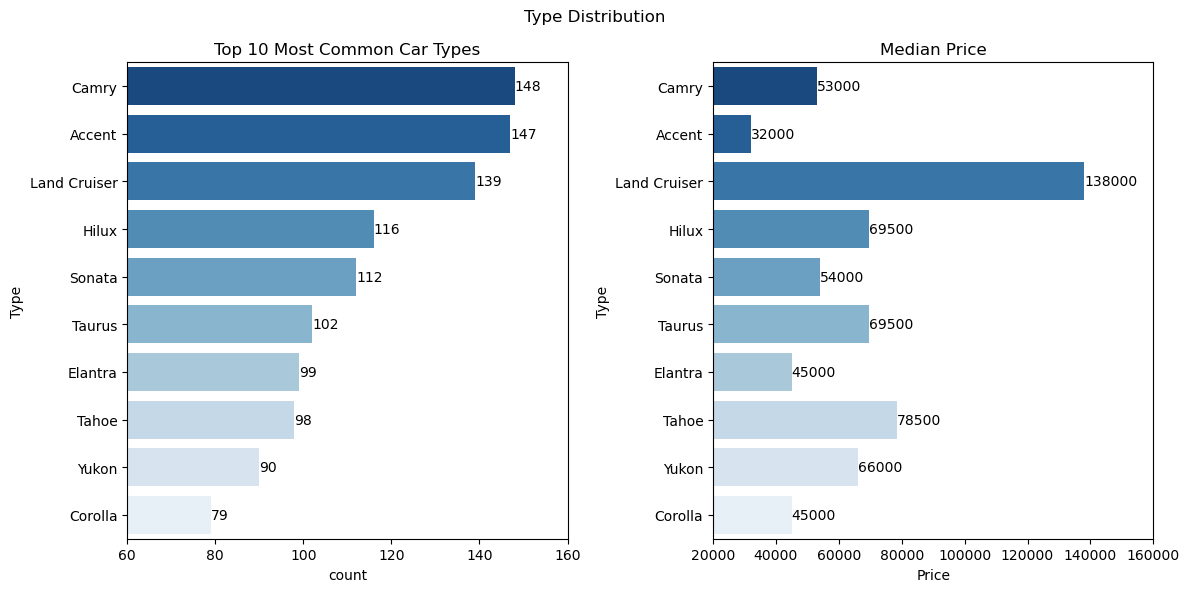

In [23]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize = (12,6))

count = sns.countplot(df_analysis,
              y = "Type",
              order=df_analysis["Type"].value_counts().index[:10],
              ax=ax1,
              palette="Blues_r")
ax1.set_title("Top 10 Most Common Car Types")
ax1.set_xlim(60,160)
for num in count.containers:
    count.bar_label(num)


price = sns.barplot(df_analysis,
            y = "Type",
            x = "Price",
            estimator="median",
            ax=ax2,
            order=df_analysis["Type"].value_counts().index[:10],
            errorbar=("ci",False),
            palette="Blues_r")
ax2.set_title("Median Price")
for num in price.containers:
    price.bar_label(num)
ax2.set_xlim(20000,160000)

fig.suptitle("Type Distribution")
plt.tight_layout()


Insight:
- We observe that the total number of listings for a particular car type has little impact on its price, as a higher listing count does not necessarily correspond to higher prices.
- The distribution of car prices among the top 10 most common car types shows significant variation, indicating a potentially high correlation between car type and price.

#### `Region` Column

The same applies to the Region column, which contains numerous unique values. For clarity and relevance, we will focus on analyzing only the top 10 most frequent regions.

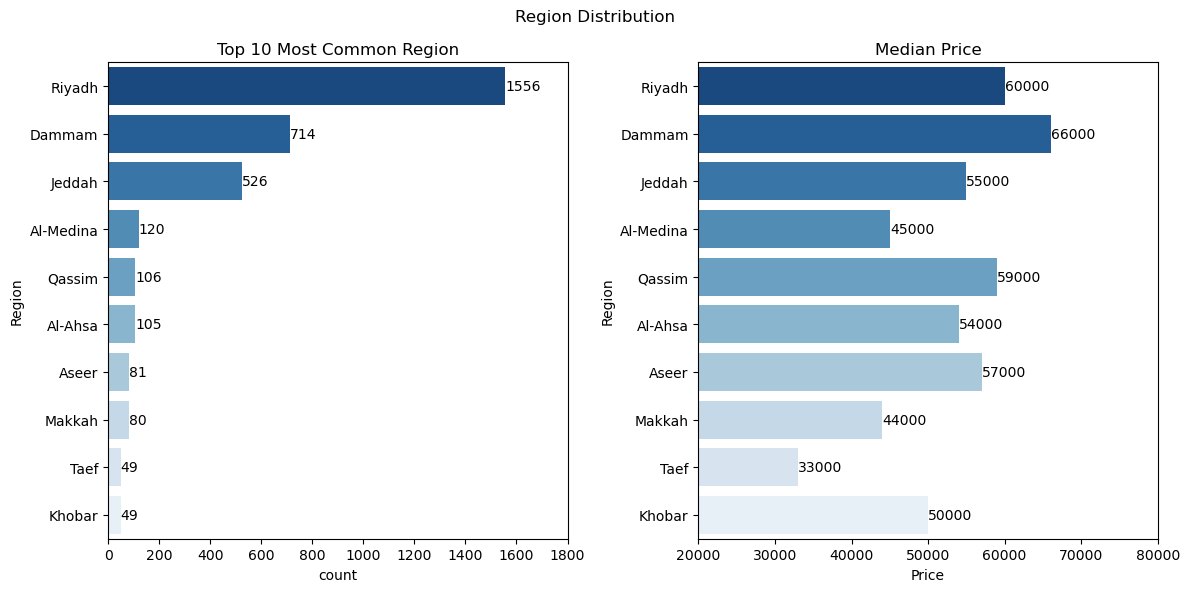

In [24]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize = (12,6))

count = sns.countplot(df_analysis,
              y = "Region",
              order=df_analysis["Region"].value_counts().index[:10],
              ax=ax1,
              palette="Blues_r")
ax1.set_title("Top 10 Most Common Region")
ax1.set_xlim(0,1800)
for num in count.containers:
    count.bar_label(num)


price = sns.barplot(df_analysis,
            y = "Region",
            x = "Price",
            estimator="median",
            ax=ax2,
            order=df_analysis["Region"].value_counts().index[:10],
            errorbar=("ci",False),
            palette="Blues_r")
ax2.set_title("Median Price")
for num in price.containers:
    price.bar_label(num)
ax2.set_xlim(20000,80000)

fig.suptitle("Region Distribution")
plt.tight_layout()

Insight:
- The majority of used car listings are concentrated in Riyadh, followed by Dammam and Jeddah.
- Region appears to have a significant impact on car prices, as the price distribution remains variable across different regions. However, further statistical analysis is required to confirm the validity of this observation.

#### `Make` Column

Due to the large number of unique values in the Make column, we will limit our analysis to the top 10 most frequently occurring car makes.

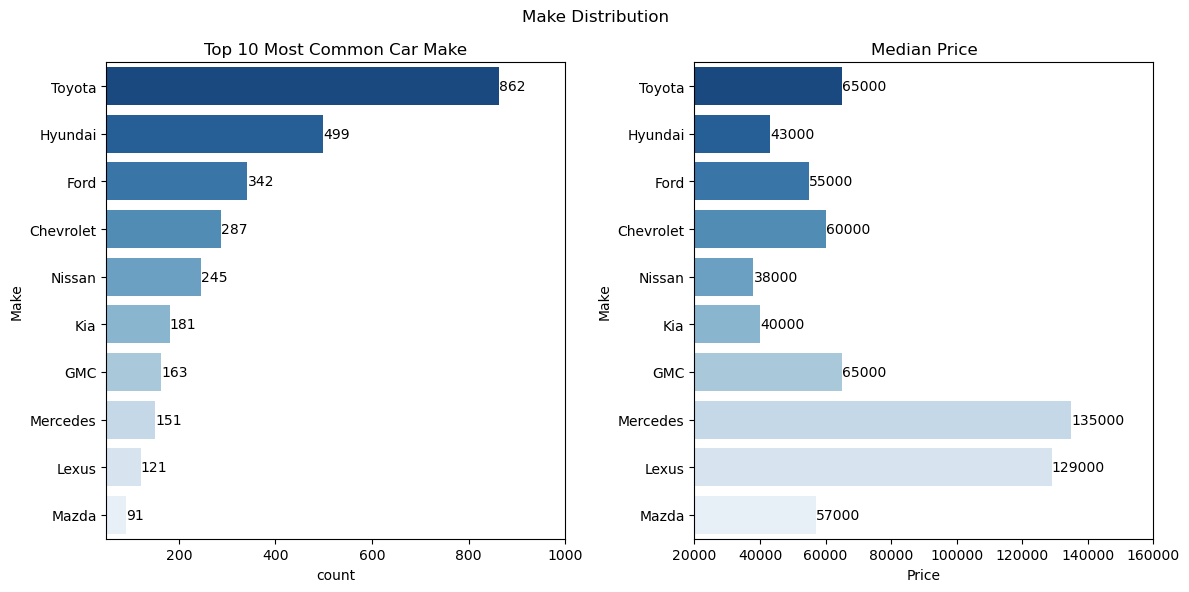

In [25]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize = (12,6))

count = sns.countplot(df_analysis,
              y = "Make",
              order=df_analysis["Make"].value_counts().index[:10],
              ax=ax1,
              palette="Blues_r")
ax1.set_title("Top 10 Most Common Car Make")
ax1.set_xlim(50,1000)
for num in count.containers:
    count.bar_label(num)


price = sns.barplot(df_analysis,
            y = "Make",
            x = "Price",
            estimator="median",
            ax=ax2,
            order=df_analysis["Make"].value_counts().index[:10],
            errorbar=("ci",False),
            palette="Blues_r")
ax2.set_title("Median Price")
for num in price.containers:
    price.bar_label(num)
ax2.set_xlim(20000,160000)

fig.suptitle("Make Distribution")
plt.tight_layout()

Insight:
- Toyota leads the used car listings with a total of 862 entries, followed by Hyundai with 499 listings.
- Car make appears to significantly influence pricing, as prices vary widely across different manufacturers.

#### `Gear_Type` Column

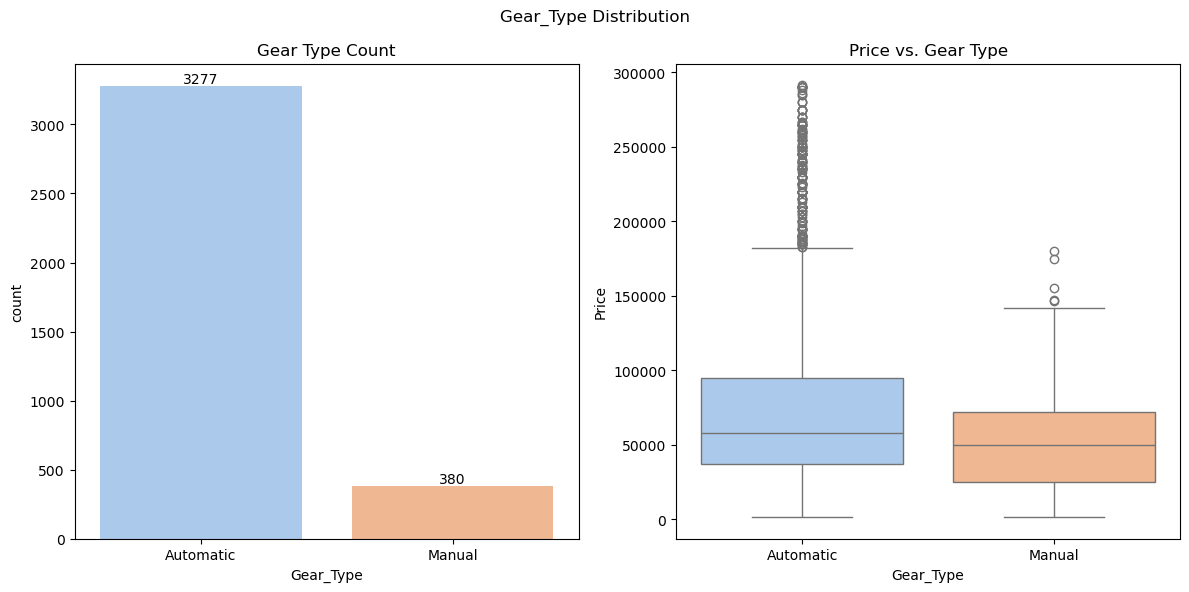

In [26]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize = (12,6))

count = sns.countplot(df_analysis,
              x = "Gear_Type",
              ax=ax1,
              palette="pastel")
ax1.set_title("Gear Type Count")
for num in count.containers:
    count.bar_label(num)


sns.boxplot(df_analysis,
            x="Gear_Type",
            y="Price",
            palette="pastel")
ax2.set_title("Price vs. Gear Type")

fig.suptitle("Gear_Type Distribution")
plt.tight_layout()

Insight:
- Automatic transmission vehicles account for the majority of listings, comprising approximately 90% of the total used car entries.
- In terms of pricing, automatic vehicles exhibit a broader price range. However, the majority of listings for both automatic and manual cars fall within a similar price bracket. This indicates that transmission type does not have a significant effect on price.

    However, further statistical analysis is necessary to determine whether the observed differences are statistically significant.

#### `Origin` Column

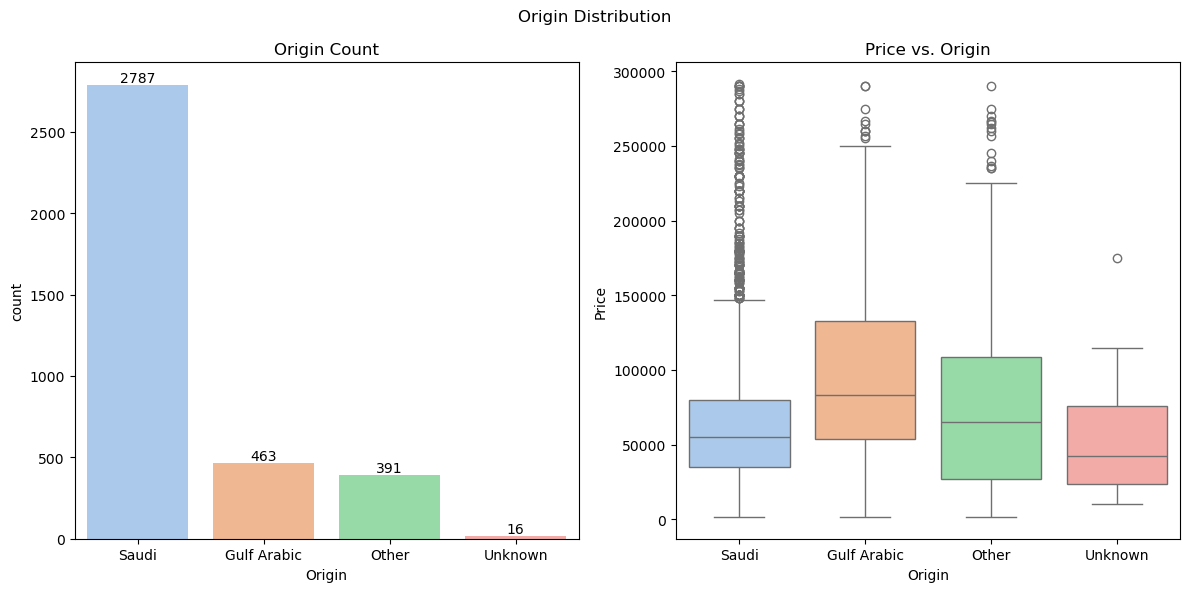

In [27]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize = (12,6))

count = sns.countplot(df_analysis,
              x = "Origin",
              ax=ax1,
              palette="pastel")
ax1.set_title("Origin Count")
for num in count.containers:
    count.bar_label(num)


sns.boxplot(df_analysis,
            x="Origin",
            y="Price",
            palette="pastel")
ax2.set_title("Price vs. Origin")

fig.suptitle("Origin Distribution")
plt.tight_layout()

Insight:
- The majority of car listings are dominated by cars originally from Saudi Arabia.
- In general, cars originating from the Gulf Arabic region tend to be slightly more expensive. This indicates that the origin does not have a significant effect on price. However, further statistical testing is required to validate this observation.

#### `Option` Column

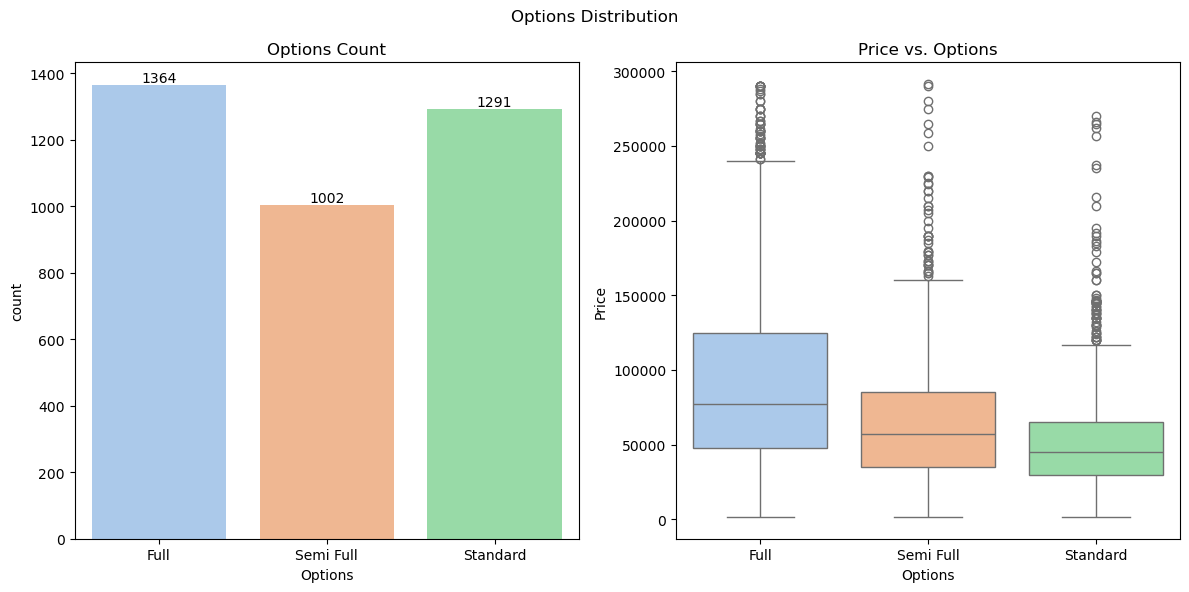

In [28]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize = (12,6))

count = sns.countplot(df_analysis,
              x = "Options",
              ax=ax1,
              palette="pastel")
ax1.set_title("Options Count")
for num in count.containers:
    count.bar_label(num)


sns.boxplot(df_analysis,
            x="Options",
            y="Price",
            palette="pastel")
ax2.set_title("Price vs. Options")

fig.suptitle("Options Distribution")
plt.tight_layout()

Insight:
- Although vehicles with full options currently have the highest number of listings, the margin compared to other option categories is relatively small.
- Car options appear to influence price, with more fully equipped vehicles generally listed at higher prices.

### Numerical Column

#### `Year` column

Text(0.5, 0.98, 'Distribution of Year Column')

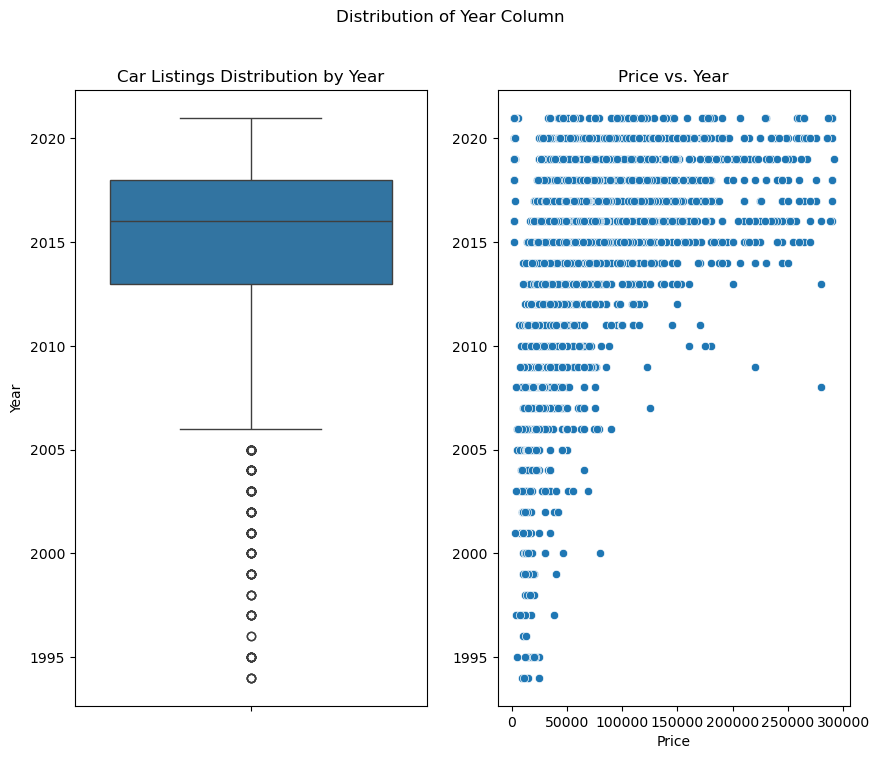

In [29]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize = (10,8), sharey=True)

sns.boxplot(df_analysis,
             y= "Year",
             ax=ax1)
ax1.set_title("Car Listings Distribution by Year")

sns.scatterplot(df_analysis,
                x="Price",
                y="Year",
                ax=ax2)
ax2.set_title("Price vs. Year")
ax2.yaxis.set_tick_params(labelleft=True)


fig.suptitle("Distribution of Year Column")

Insight:
- The majority of listed cars were manufactured between 2014 and 2018.
- The distribution of car manufacturing years is negatively skewed.
- Older vehicles are generally priced lower.
- Newer vehicles tend to show higher variance in price.

#### `Engine_Size` column

Text(0.5, 0.98, 'Distribution of Engine_size Column')

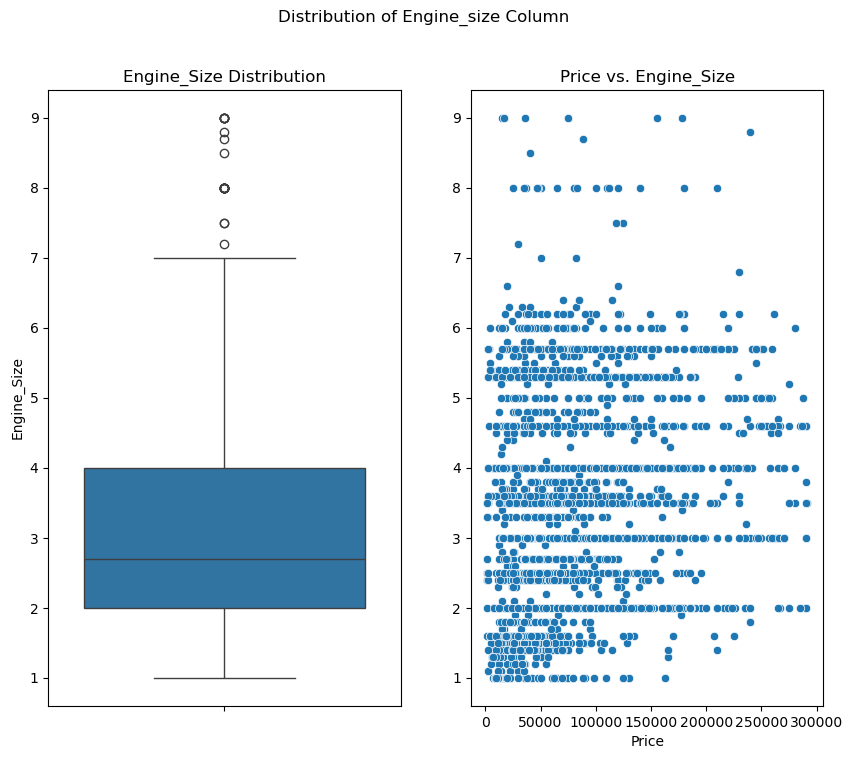

In [30]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize = (10,8), sharey=True)

sns.boxplot(df_analysis,
             y= "Engine_Size",
             ax=ax1)
ax1.set_title("Engine_Size Distribution")

sns.scatterplot(df_analysis,
                x="Price",
                y="Engine_Size",
                ax=ax2)
ax2.set_title("Price vs. Engine_Size")
ax2.yaxis.set_tick_params(labelleft=True)

fig.suptitle("Distribution of Engine_size Column")

Insight:
- The majority of vehicles have engine sizes ranging from 2 to 4 liters.
- There is no clear evidence indicating that engine size significantly influences the price of used cars.

#### `Mileage` Column

Text(0.5, 0.98, 'Distribution of Mileage Column')

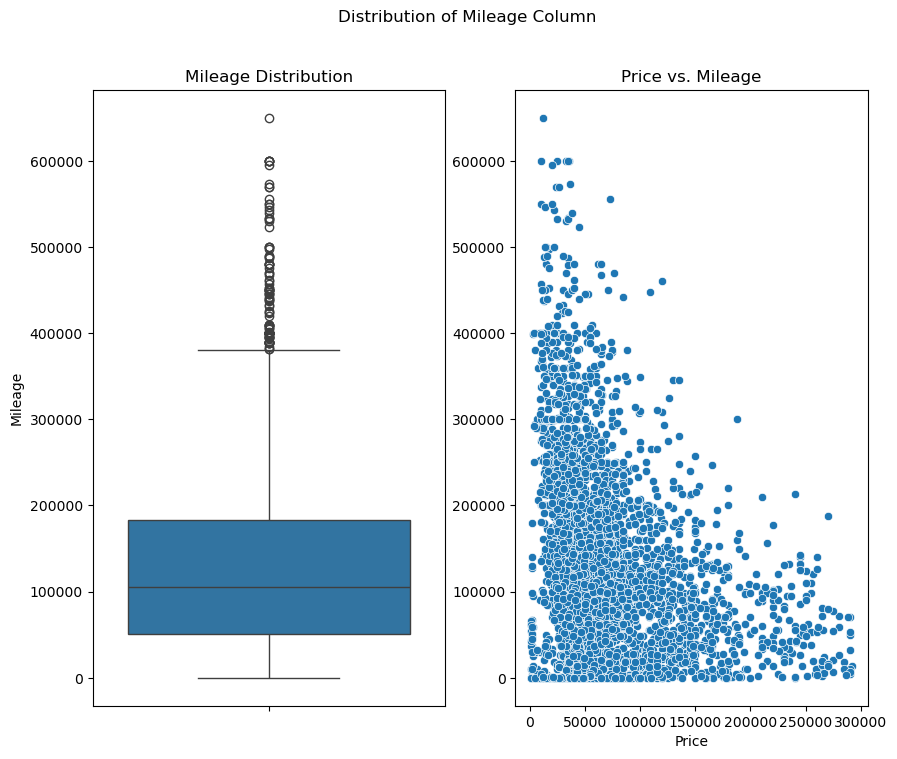

In [31]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize = (10,8), sharey=True)

sns.boxplot(df_analysis,
             y= "Mileage",
             ax=ax1)
ax1.set_title("Mileage Distribution")

sns.scatterplot(df_analysis,
                x="Price",
                y="Mileage",
                ax=ax2)
ax2.set_title("Price vs. Mileage")
ax2.yaxis.set_tick_params(labelleft=True)

fig.suptitle("Distribution of Mileage Column")

Insight:
- Most cars have a mileage of approximately 100,000 kilometers.
- Several cars have significantly higher mileage, which can be considered outliers.
- Car prices tend to show greater variability at lower mileage levels, while higher mileage cars are generally priced lower.

#### `Price` Column

Text(0.5, 1.0, 'Price Distribution')

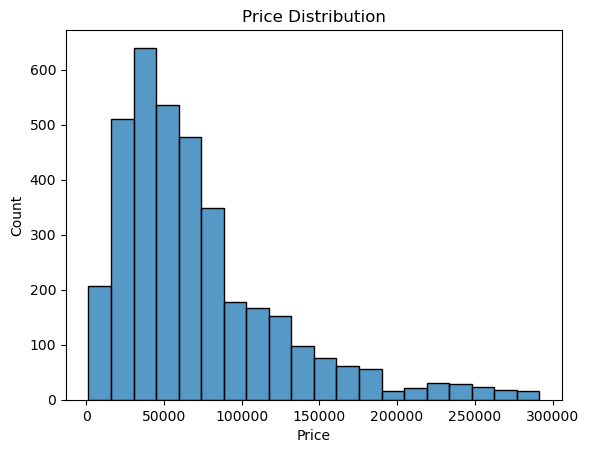

In [32]:
sns.histplot(df_analysis,
             x="Price",
             bins=20)
plt.title("Price Distribution")

Insight:
- The distribution of car prices is not normal.
- Most listed car prices fall below 50,000 SAR.

#### Numerical Columns Correlation

<Axes: >

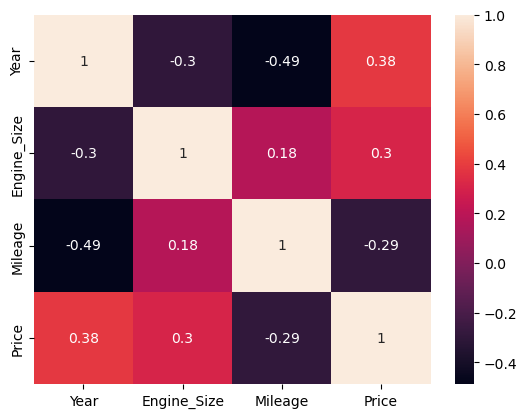

In [33]:
sns.heatmap(df_analysis.select_dtypes(include="number").corr(),
            annot=True)

Insight:
- Most numerical features show a positive correlation with price; however, mileage exhibits a negative correlation, indicating that as mileage increases, the price decreases.

## Modeling

### Splitting Dataset

Since our goal is to predict car prices, the "Price" column will serve as the target variable, while the remaining columns will be used as features.

In [34]:
# Define X and y
X = df_analysis.drop("Price", axis=1)
y = df_analysis["Price"]

In [35]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Preprocessing

for this general preprocessing, we wil do the following:

- Categorical Column
    - Binary Encoding: `Type`, `Region`, `Make`

        We apply Binary Encoding to these columns because they are nominal categorical variables with a high number of unique values.

    - One-Hot Encoding: `Gear_Type`, `Origin`, `Options`

        We apply One-Hot Encoding to these columns because they contain a low number of unique categorical values.

- Numerical Column
    - Capping extreme outlier: `Year`, `Engine_Size`, `Mileage`

       We will cap the outliers in each column at their respective boundary values.

    - Robust Scaler: `Year`, `Engine_Size`, `Mileage`

        We apply Robust Scaling to these columns because they are not normally distributed.

- Removed: `Negotiable`

    We will remove the 'Negotiable' column from the dataset, as our analysis only includes listings with non-negotiable prices.

In [36]:
# boundary values for extreme outliers
extreme_outlier

,column,lower_bound,upper_bound
0,Year,1994.0,2036.0
1,Engine_Size,-5.5,12.0
2,Mileage,-436000.0,670000.0
3,Price,-219000.0,292000.0


In [37]:
# Pipeline for numerical features
num_preprocessing = Pipeline([
    ("outlier_cap",ArbitraryOutlierCapper(
        max_capping_dict={
            "Year": 2036,
            "Engine_Size": 12,
            "Mileage": 670000
        }
    )),
    ("robust", RobustScaler())
])

In [38]:
# Create the ColumnTransformer
transformer = ColumnTransformer([
    ("binary",BinaryEncoder(), ["Type","Region","Make"]),
    ("one-hot", OneHotEncoder(handle_unknown="ignore"), ["Gear_Type","Origin","Options"]),
    ("robust", num_preprocessing, ["Year","Engine_Size","Mileage"])
],remainder="drop")

In [39]:
transformer

ColumnTransformer(transformers=[('binary', BinaryEncoder(),
                                 ['Type', 'Region', 'Make']),
                                ('one-hot',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Gear_Type', 'Origin', 'Options']),
                                ('robust',
                                 Pipeline(steps=[('outlier_cap',
                                                  ArbitraryOutlierCapper(max_capping_dict={'Engine_Size': 12,
                                                                                           'Mileage': 670000,
                                                                                           'Year': 2036})),
                                                 ('robust', RobustScaler())]),
                                 ['Year', 'Engine_Size', 'Mileage'])])

### Modeling with Pipeline

Initially, we will experiment with the following algorithms to establish a strong baseline model for subsequent hyperparameter tuning:

    - Linear Regression
    - K-Nearest Neighbors Regressor
    - Decision Tree Regressor
    - Random Forest Regressor
    - Support Vector Regressor
    - Adaboost
    - XGBoost

Since the target variable is positively skewed, we will also experiment with applying a logarithmic transformation to the target before modeling.

In [40]:
# define models
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
svr = SVR()
ab = AdaBoostRegressor()
xgb = XGBRegressor()
log_lr = TransformedTargetRegressor(regressor=lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(regressor=knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(regressor=dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(regressor=rf, func=np.log, inverse_func=np.exp)
log_svr = TransformedTargetRegressor(regressor=svr, func=np.log, inverse_func=np.exp)
log_ab = TransformedTargetRegressor(regressor=ab, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(regressor=xgb, func=np.log, inverse_func=np.exp)
model_list = [lr,knn,dt,rf,svr,ab,xgb,log_lr,log_knn,log_dt,log_rf,log_svr,log_ab,log_xgb]

In [41]:
# Create the Pipeline
full_pipeline = Pipeline([
    ("transformer", transformer),
    ("model", lr)
])

In [42]:
full_pipeline

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('binary', BinaryEncoder(),
                                                  ['Type', 'Region', 'Make']),
                                                 ('one-hot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gear_Type', 'Origin',
                                                   'Options']),
                                                 ('robust',
                                                  Pipeline(steps=[('outlier_cap',
                                                                   ArbitraryOutlierCapper(max_capping_dict={'Engine_Size': 12,
                                                                                                            'Mileage': 670000,
                                                                                                            'Year': 2036})),
                                                                  ('robust',
                                                                   RobustScaler())]),
                                                  ['Year', 'Engine_Size',
                                                   'Mileage'])])),
                ('model', LinearRegression())])

### Finding Baseline Model

In [43]:
# Create the parameter grid
param_grid = {
    "model":model_list
}

# Create the GridSearchCV
model_grid = GridSearchCV(
    estimator=full_pipeline,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring="neg_root_mean_squared_error",
    return_train_score=True
)

In [44]:
model_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('binary',
                                                                         BinaryEncoder(),
                                                                         ['Type',
                                                                          'Region',
                                                                          'Make']),
                                                                        ('one-hot',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Gear_Type',
                                                                          'Origin',
                                                                          'Options']),
                                                                        ('robust',
                                                                         Pipeline(steps=[('outlier_cap',
                                                                                          ArbitraryOutlierCapper(max_capping_dict={'Engine_Size': 12,
                                                                                                                                   'Mileage': 670000,
                                                                                                                                   'Year':...
                                                                                     learning_rate=None,
                                                                                     max_bin=None,
                                                                                     max_cat_threshold=None,
                                                                                     max_cat_to_onehot=None,
                                                                                     max_delta_step=None,
                                                                                     max_depth=None,
                                                                                     max_leaves=None,
                                                                                     min_child_weight=None,
                                                                                     missing=nan,
                                                                                     monotone_constraints=None,
                                                                                     multi_strategy=None,
                                                                                     n_estimators=None,
                                                                                     n_jobs=None,
                                                                                     num_parallel_tree=None,
                                                                                     random_state=None, ...))]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [45]:
# View the results
model_name_list = ["LinearRegression",
                   "KNeighborsRegressor",
                   "DecisionTreeRegressor",
                   "RandomForestRegressor",
                   "SVR",
                   "AdaBoostRegressor",
                   "XGBRegressor",
                   "LogLinearRegression",
                   "LogKNeighborsRegressor",
                   "LogDecisionTreeRegressor",
                   "LogRandomForestRegressor",
                   "LogSVR",
                   "LogAdaBoostRegressor",
                   "LogXGBRegressor"]

# Create a DataFrame
base_model_result = pd.DataFrame(model_grid.cv_results_)

base_model_result["model"] = model_name_list

base_model_result["mean_test_rmse"] = base_model_result["mean_test_score"].apply(lambda x: abs(x))
base_model_result["std_test_rmse"] = base_model_result["std_test_score"].apply(lambda x: abs(x))

base_model_result["mean_train_rmse"] = base_model_result["mean_train_score"].apply(lambda x: abs(x))
base_model_result["std_train_rmse"] = base_model_result["std_train_score"].apply(lambda x: abs(x))

base_model_result = base_model_result[["model",
                                       "mean_train_rmse",
                                       "std_train_rmse",
                                       "mean_test_rmse",
                                       "std_test_rmse"]]

base_model_result.sort_values("mean_test_rmse",ascending=True, inplace=True)
base_model_result.head(7)

,model,mean_train_rmse,std_train_rmse,mean_test_rmse,std_test_rmse
11,LogSVR,18674.563574,374.136016,24855.890133,812.251945
6,XGBRegressor,4862.750391,289.163937,26335.842578,1218.964391
3,RandomForestRegressor,10032.670893,100.727509,27256.447000,663.487293
13,LogXGBRegressor,6756.833496,114.922433,29079.123047,1597.145283
10,LogRandomForestRegressor,12622.116162,218.438107,29294.217952,1080.301270
1,KNeighborsRegressor,23693.956027,232.885481,29329.209913,1424.350573
8,LogKNeighborsRegressor,24327.042277,352.564815,29645.919582,1442.531454


Insight:
- LogSVR achieved the highest performance score, although it exhibited some overfitting.
- XGBRegressor produced similar results on unseen data, however, it suffered from severe overfitting.
- RandomForestRegressor also delivered solid performance, while it overfit more severely than LogSVR, it demonstrated greater stability as indicated by a lower standard deviation in results.

Since LogSVR achieved the highest performance score, we selected it for hyperparameter tuning.

## Hyperparameter Tuning

Since our model is currently overfitting, we need to implement strategies to reduce overfitting and improve generalization for more accurate predictions.

In this section, we will:

1. Perform hyperparameter tuning on the model, focusing on:

    - Regularization parameter C: Lower values increase regularization, helping to reduce overfitting.
    - gamma parameter: Lower values result in a less complex model, reducing overfitting.
    - epsilon parameter: Larger values create a wider margin of tolerance, reducing the model’s sensitivity to small variations and thus lowering overfitting.
    - Kernel type (linear, poly, rbf): Simpler kernels, such as linear or polynomial, can lead to reduced overfitting compared to more flexible kernels like RBF.

2. Apply SelectKBest for feature selection, followed by hyperparameter tuning on the reduced feature set.

In [46]:
# redefine the preprocessing and model pipeline
transformer = ColumnTransformer([
    ("binary",BinaryEncoder(), ["Type","Region","Make"]),
    ("one-hot", OneHotEncoder(handle_unknown="ignore"), ["Gear_Type","Origin","Options"]),
    ("robust", num_preprocessing, ["Year","Engine_Size","Mileage"])
],remainder="drop")

model_pipe = Pipeline([
    ("transformer", transformer),
    ("model", log_svr)
])

In [47]:
# Define the results DataFrame for comparing evaluation
result = pd.DataFrame(columns=["model",
                               "train_rmse",
                               "test_rmse",
                               "train mae",
                               "test mae",
                               "train mape",
                               "test mape"])


def add_result(name,y_pred_train, y_pred_test):
    result.loc[len(result)] = [name,
                               round(root_mean_squared_error(y_train,y_pred_train),1),
                               round(root_mean_squared_error(y_test,y_pred_test),1),
                               round(mean_absolute_error(y_train,y_pred_train),1),
                               round(mean_absolute_error(y_test,y_pred_test),1),
                               round(mean_absolute_percentage_error(y_train,y_pred_train),3),
                               round(mean_absolute_percentage_error(y_test,y_pred_test),3)]

**Base model**

In [48]:
# Define the base model
base_svr = SVR()
log_base_svr = TransformedTargetRegressor(regressor=base_svr, func=np.log, inverse_func=np.exp)
base_svr_pipe = Pipeline([
    ("transformer", transformer),
    ("model", log_base_svr)
])

# Fit the base model
base_svr_pipe.fit(X_train,y_train)

# Make predictions
base_svr_pred_train = base_svr_pipe.predict(X_train)
base_svr_pred_test = base_svr_pipe.predict(X_test)

# Add the results to the DataFrame
add_result("Base SVR",base_svr_pred_train, base_svr_pred_test)

#### Tuning Hyperparameter

In [49]:
# Define the tuned model
svr_tune = SVR()
log_svr_tune = TransformedTargetRegressor(regressor=svr_tune, func=np.log, inverse_func=np.exp)
svr_tune_pipe = Pipeline([
    ("transformer", transformer),
    ("model", log_svr_tune)
])

# Set the parameter
# These parameters have been tuned to identify the optimal configuration.
param_grid = {
    "model__regressor__kernel": ["rbf"],
    "model__regressor__C": [3,4,5],
    "model__regressor__epsilon": [0.05, 0.06, 0.07, 0.08, 0.09],
    "model__regressor__gamma": ["scale", "auto",]
}

svr_grid = GridSearchCV(
    estimator = svr_tune_pipe,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring="neg_root_mean_squared_error",
    return_train_score=True
)

In [50]:
svr_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('binary',
                                                                         BinaryEncoder(),
                                                                         ['Type',
                                                                          'Region',
                                                                          'Make']),
                                                                        ('one-hot',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Gear_Type',
                                                                          'Origin',
                                                                          'Options']),
                                                                        ('robust',
                                                                         Pipeline(steps=[('outlier_cap',
                                                                                          ArbitraryOutlierCapper(max_capping_dict={'Engine_Size': 12,
                                                                                                                                   'Mileage': 670000,
                                                                                                                                   'Year':...
                                                                          'Mileage'])])),
                                       ('model',
                                        TransformedTargetRegressor(func=<ufunc 'log'>,
                                                                   inverse_func=<ufunc 'exp'>,
                                                                   regressor=SVR()))]),
             n_jobs=-1,
             param_grid={'model__regressor__C': [3, 4, 5],
                         'model__regressor__epsilon': [0.05, 0.06, 0.07, 0.08,
                                                       0.09],
                         'model__regressor__gamma': ['scale', 'auto'],
                         'model__regressor__kernel': ['rbf']},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [51]:
svr_grid.best_params_

{'model__regressor__C': 4,
 'model__regressor__epsilon': 0.07,
 'model__regressor__gamma': 'scale',
 'model__regressor__kernel': 'rbf'}

In [52]:
tuning_result = pd.DataFrame(svr_grid.cv_results_)

tuning_result["mean_test_rmse"] = tuning_result["mean_test_score"].apply(lambda x: abs(x))
tuning_result["std_test_rmse"] = tuning_result["std_test_score"].apply(lambda x: abs(x))

tuning_result["mean_train_rmse"] = tuning_result["mean_train_score"].apply(lambda x: abs(x))
tuning_result["std_train_rmse"] = tuning_result["std_train_score"].apply(lambda x: abs(x))

tuning_result = tuning_result[["param_model__regressor__C",
                                "param_model__regressor__epsilon",
                                "param_model__regressor__gamma",
                                "mean_train_rmse",
                                "std_train_rmse",
                                "mean_test_rmse",
                                "std_test_rmse"]]

tuning_result.sort_values("mean_test_rmse",ascending=True, inplace=True)
tuning_result.head()

,param_model__regressor__C,param_model__regressor__epsilon,param_model__regressor__gamma,mean_train_rmse,std_train_rmse,mean_test_rmse,std_test_rmse
14,4,0.07,scale,11779.767082,505.782403,23913.698533,854.994300
24,5,0.07,scale,10786.326693,602.869459,23922.405738,934.124489
22,5,0.06,scale,10637.361624,614.510780,23926.569882,930.281575
16,4,0.08,scale,11925.875039,497.280690,23930.300909,848.416202
12,4,0.06,scale,11674.303570,519.031904,23936.228639,853.436971


Although we attempted to reduce overfitting by using a smaller `C`, a larger `epsilon`, and simpler kernels, GridSearchCV identified that a model with a high `C` (4), a small `epsilon` (0.07), and an `RBF` kernel produced the lowest RMSE overall, despite still exhibiting signs of overfitting.

In [53]:
# Define the model
svr_tune = svr_grid.best_estimator_

# Fit the tuned model
svr_tune.fit(X_train,y_train)

# Make predictions
svr_tune_pred_train = svr_tune.predict(X_train)
svr_tune_pred_test = svr_tune.predict(X_test)

# Add the results to the DataFrame
add_result("SVR_tune",svr_tune_pred_train,svr_tune_pred_test)

#### Feature Selection

In [54]:
svr_tune_pipe.named_steps["transformer"].get_feature_names_out().shape

(32,)

To address overfitting, we will also experiment with reducing the number of features. Since we are using a Support Vector Regressor with an `rbf` kernel, our model is neither linear nor tree-based, making it difficult to directly determine feature importance. Therefore, we will use SelectKBest for feature selection.

After preprocessing the data, we identified a total of 32 features. We will determine the optimal number of features to use for the model.

In [55]:
# Define selectKBest
selectKBest = SelectKBest(k=32)

# Define the model
svr = SVR()
log_svr = TransformedTargetRegressor(regressor=svr, func=np.log, inverse_func=np.exp)
feature_selection_pipe = Pipeline([
    ("transformer", transformer),
    ("selector", selectKBest),
    ("model", log_svr)
])

In [56]:
# Define the parameter for selectKBest
param_grid = {
    "selector__k": list(range(24,33)),
    "model__regressor__kernel": ["rbf"],
    "model__regressor__C": [2, 3, 4, 5],
    "model__regressor__epsilon": [ 0.06, 0.07, 0.08],
    "model__regressor__gamma": ["scale"]
}

svr_grid = GridSearchCV(
    estimator = feature_selection_pipe,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring="neg_root_mean_squared_error"
)

In [57]:
svr_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('binary',
                                                                         BinaryEncoder(),
                                                                         ['Type',
                                                                          'Region',
                                                                          'Make']),
                                                                        ('one-hot',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Gear_Type',
                                                                          'Origin',
                                                                          'Options']),
                                                                        ('robust',
                                                                         Pipeline(steps=[('outlier_cap',
                                                                                          ArbitraryOutlierCapper(max_capping_dict={'Engine_Size': 12,
                                                                                                                                   'Mileage': 670000,
                                                                                                                                   'Year':...
                                       ('model',
                                        TransformedTargetRegressor(func=<ufunc 'log'>,
                                                                   inverse_func=<ufunc 'exp'>,
                                                                   regressor=SVR()))]),
             n_jobs=-1,
             param_grid={'model__regressor__C': [2, 3, 4, 5],
                         'model__regressor__epsilon': [0.06, 0.07, 0.08],
                         'model__regressor__gamma': ['scale'],
                         'model__regressor__kernel': ['rbf'],
                         'selector__k': [24, 25, 26, 27, 28, 29, 30, 31, 32]},
             scoring='neg_root_mean_squared_error')

In [58]:
svr_grid.best_params_

{'model__regressor__C': 3,
 'model__regressor__epsilon': 0.07,
 'model__regressor__gamma': 'scale',
 'model__regressor__kernel': 'rbf',
 'selector__k': 27}

In [59]:
# Define the model
svr_kbest = svr_grid.best_estimator_
# Fit the base model
svr_kbest.fit(X_train,y_train)

# Make predictions
svr_kbest_pred_train = svr_kbest.predict(X_train)
svr_kbest_pred_test = svr_kbest.predict(X_test)

# Add the results to the DataFrame
add_result("SVR_kbest",svr_kbest_pred_train, svr_kbest_pred_test)

### Performance comparison

In [60]:
result

,model,train_rmse,test_rmse,train mae,test mae,train mape,test mape
0,Base SVR,18663.3,24210.0,9554.0,13948.6,0.412,0.641
1,SVR_tune,11951.1,23294.1,6024.8,13524.2,0.303,0.637
2,SVR_kbest,14615.3,23343.2,7063.4,13453.7,0.361,0.627


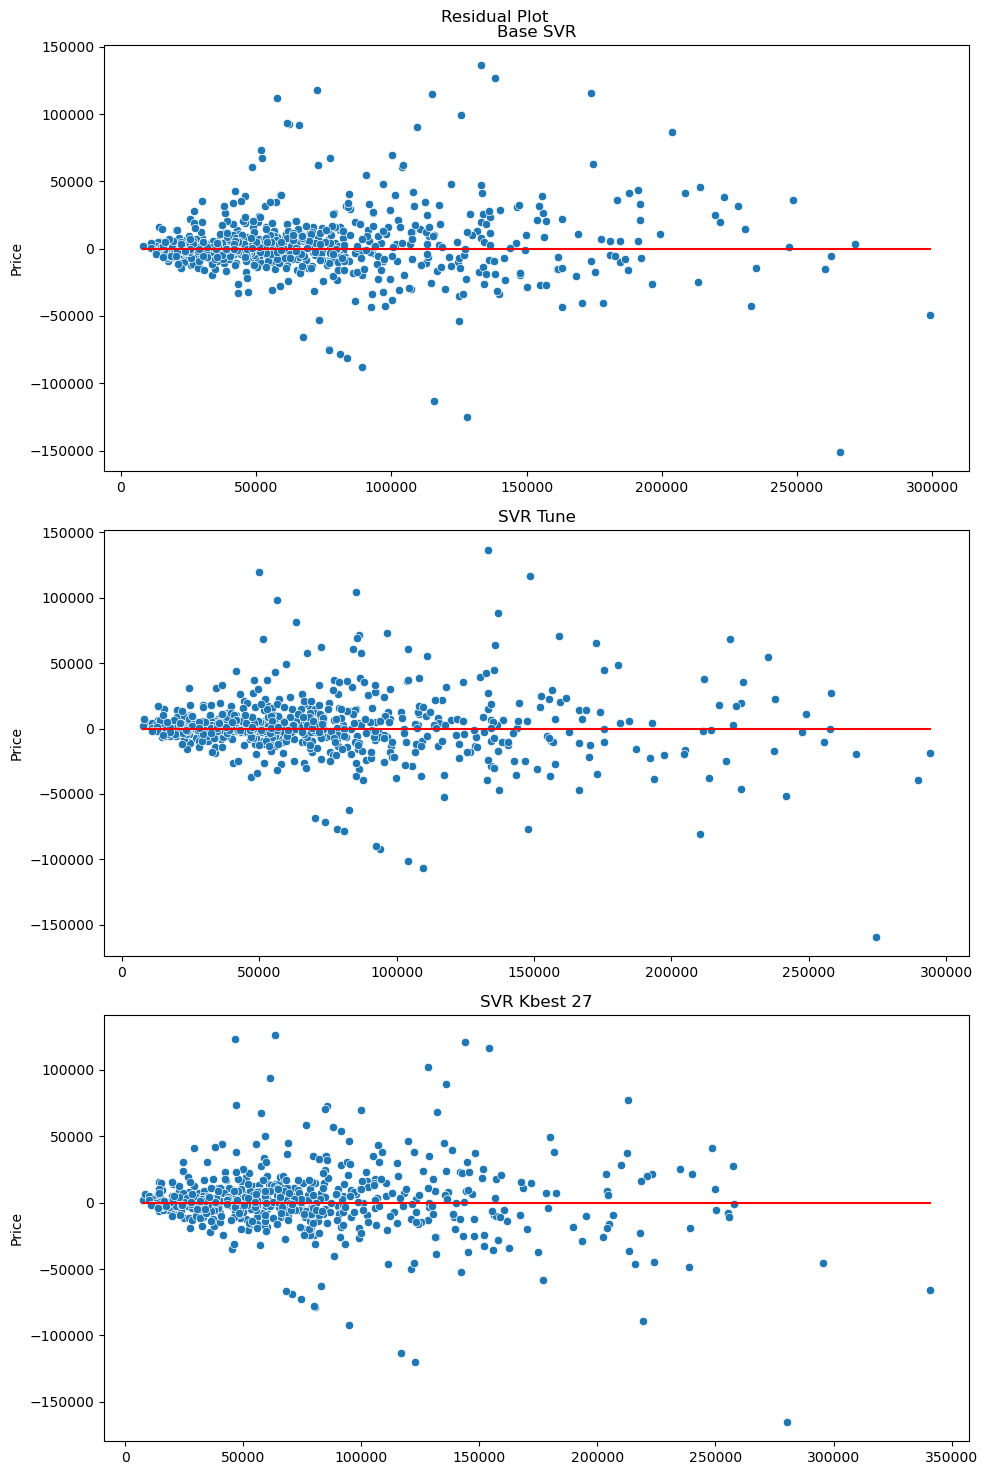

In [61]:
plt.figure(figsize=(10,15))
plt.subplot(3,1,1)
sns.scatterplot(x=base_svr_pred_test,y=y_test-base_svr_pred_test)
sns.lineplot(x = base_svr_pred_test, y = 0, color="red")
plt.title("Base SVR")

plt.subplot(3,1,2)
sns.scatterplot(x=svr_tune_pred_test,y=y_test-svr_tune_pred_test)
sns.lineplot(x = svr_tune_pred_test,y = 0, color="red")
plt.title("SVR Tune")

plt.subplot(3,1,3)
sns.scatterplot(x=svr_kbest_pred_test,y=y_test-svr_kbest_pred_test)
sns.lineplot(x = svr_kbest_pred_test,y = 0, color="red")
plt.title("SVR Kbest 27")

plt.suptitle("Residual Plot")
plt.tight_layout()

Insight:
- The base SVR model generalizes better than the tuned and feature-selected versions; however, this comes at the cost of having the highest RMSE and MAE.
- The tuned model achieves the lowest error on unseen data but suffers from severe overfitting.
- The feature selection model reduces overfitting while maintaining error levels similar to the tuned model. It also achieves the lowest MAPE, indicating smaller errors relative to the actual values.
- From the residual plot, all of our models exhibit signs of heteroscedasticity, meaning the variance of the errors increases slightly as the target price rises. This is likely due to the limited number of data points for higher-priced used cars.
- There are also certain used cars that our model fails to predict accurately. Further investigation into these specific cases is needed to better understand the model’s limitations.

Based on the results above, we selected `SVR_kbest` as our final model. Although it still suffers from overfitting, it achieves RMSE and MAE values comparable to the tuned model while delivering the lowest MAPE. Additionally, it benefits from using fewer features, resulting in faster overall training.

## Model Explaination

We will analyze and interpret how our model makes predictions by using model interpretation techniques SHAP.

  0%|          | 0/100 [00:00<?, ?it/s]

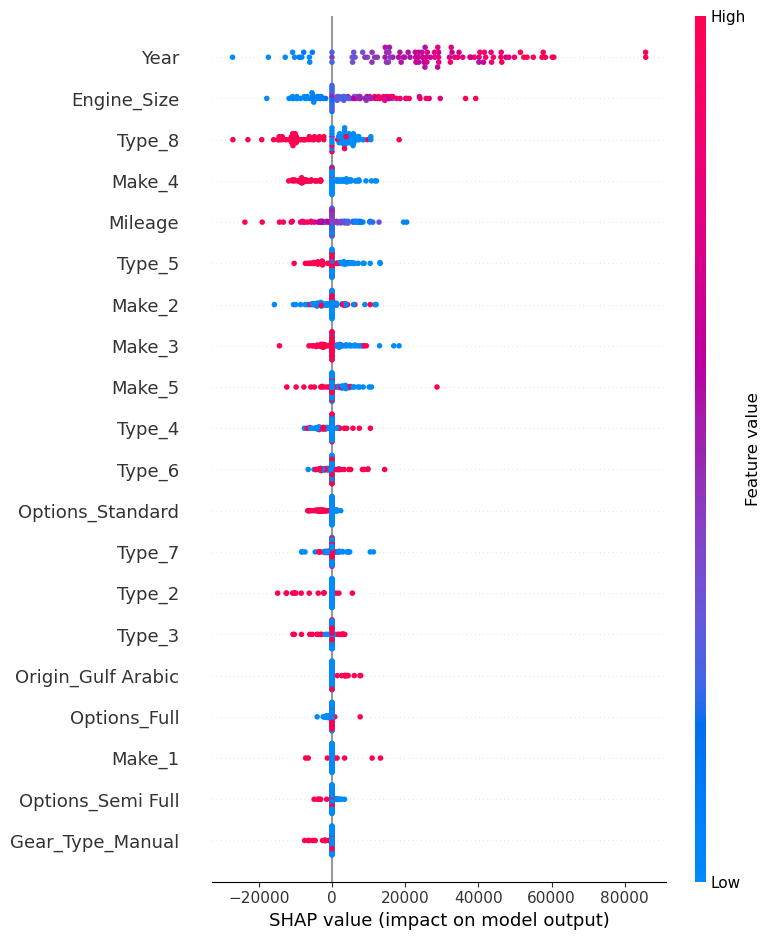

In [62]:
# We need the final input to the model after preprocessing
X_train_transformed = svr_kbest[:-1].transform(X_train)
X_test_transformed = svr_kbest[:-1].transform(X_test)

# Use a small background sample for speed
sample = X_train_transformed[np.random.choice(X_train_transformed.shape[0], 5, replace=False)]

# Define a prediction function for SHAP
explainer = shap.KernelExplainer(svr_kbest[-1].predict, sample)

# Explain predictions for some test samples
shap_values = explainer.shap_values(X_test_transformed[:100])

# Get selected feature indices from SelectKBest
selected_indices = svr_kbest.named_steps['selector'].get_support(indices=True)
feature_name = svr_kbest.named_steps["transformer"].get_feature_names_out()[selected_indices]

# Better feature names
feature_name = [word.split("__")[1] for word in feature_name]

# Visualization
shap.summary_plot(shap_values, X_test_transformed[:100], feature_names=feature_name)


Insight:
- `Year` and `Engine_size` have the greatest influence on price. Newer cars and those with larger engine sizes tend to have higher prices, while older cars and smaller engine sizes are generally priced lower.
- Mileage also impacts price, with higher mileage typically lowering the predicted price and lower mileage increasing it.
- Certain Type and Make categories also affect price, particularly type_8 and make_4. However, because these features were encoded using binary encoding, their direct interpretation is more challenging.

## Model Limitation

**Listing prices vs. transaction prices:** The data is sourced from current online listings, which reflect seller asking prices rather than actual sale prices agreed upon by buyers. This introduces bias, as these prices may not represent the true market value.

**Data scarcity in high-price segments:** The dataset contains few examples of higher-priced used cars, resulting in higher prediction errors for this segment. To mitigate extreme values, we applied outlier capping; however, this also limits the model’s ability to accurately predict prices for these rare cases.

**Limited feature set:** Some potentially important factors affecting car prices are not included in the dataset. Incorporating more relevant features and collecting additional data points would help the model learn patterns more effectively and improve prediction accuracy.

**Low model interpretability:** Using SVR with a non-linear kernel makes it difficult to directly interpret the model’s decision-making process. While tools like SHAP provide some insight into feature importance, the explanations are less intuitive compared to those from more inherently interpretable models.

## Conclusion

1. SVR with a non-linear kernel and feature selection emerged as the best-performing model for predicting used car prices. However, its performance still falls short of expectations, with approximately 23,000 SAR RMSE, 13,000 SAR MAE, and 60% MAPE—well above our success criteria of 5,000 SAR MAE, 7,000 SAR RMSE, and 6.5% MAPE.

2. At present, relying on human experts remains the most reliable way to sustain revenue. Nonetheless, this does not mean the machine learning model cannot be improved. The scarcity of training data is the primary obstacle to further development, as reflected in the small dataset size, the fact that the most overfitted model still outperforms others, and the non-constant variance observed in the residual plots.

## Recommendation

**Data Scarcity**

Adding more data is crucial, as it is currently the main bottleneck in our model’s performance. We are confident that increasing the dataset size will significantly improve accuracy. Our primary recommendation is to start collecting data on sold cars from our platform. Assuming an average of 500 sold cars per month, we could accumulate 6,000 new data points in one year, already surpassing our current dataset size of 5,624. Another option is to acquire data from other platforms, though this may involve additional costs.

<br>

**More Features**

In addition to increasing the number of data points, we also need more diverse and relevant features to improve the model. Currently, we lack important information about certain aspects of the cars, such as whether parts are broken, the vehicle’s condition from photos, cleanliness, color, and other potentially influential factors. We recommend that, while gathering more data, we also capture these detailed attributes to enhance the quality and richness of the dataset.

<br>

**More Complex Models**

As we collect more data, we can also experiment with more complex models. For example, neural network-based approaches could be explored, especially once we have enough data to reduce overfitting risks. This would also allow us to incorporate unstructured data types, such as images or audio into the prediction process, further improving model capability.

---

## Retrain and Save model

In [63]:
# Retraining the model on all dataset
svr = svr_kbest
svr.fit(X,y)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('binary', BinaryEncoder(),
                                                  ['Type', 'Region', 'Make']),
                                                 ('one-hot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gear_Type', 'Origin',
                                                   'Options']),
                                                 ('robust',
                                                  Pipeline(steps=[('outlier_cap',
                                                                   ArbitraryOutlierCapper(max_capping_dict={'Engine_Size': 12,
                                                                                                            'Mileage': 670000,
                                                                                                            'Year': 2036})),
                                                                  ('robust',
                                                                   RobustScaler())]),
                                                  ['Year', 'Engine_Size',
                                                   'Mileage'])])),
                ('selector', SelectKBest(k=27)),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=SVR(C=3, epsilon=0.07)))])

In [64]:
import joblib

In [65]:
# Save the model
# joblib.dump(svr, "svr_model.joblib")

**Predict to a new data**

In [66]:
# new data
new_data = pd.DataFrame({
    "Type":["Sedan"],
    "Region":["Riyadh"],
    "Make":["Toyota"],
    "Gear_Type":["Automatic"],
    "Origin":["Japan"],
    "Options":["Full"],
    "Year":[2018],
    "Engine_Size":[2.5],
    "Mileage":[45000],
    "Negotiable":[False]
})


In [67]:
print(f"The predicted price is: {svr.predict(new_data)[0]:,.0f} SAR")

The predicted price is: 95,914 SAR
